In [1]:
%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("core") is None:
    import sys
    sys.path.append('..')

In [2]:
import os
import core
import models
import config
from IPython.display import Image, display

/home/notiqq/miniconda3/envs/image-embeddings/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
core.remove_background_from_images(config.INDEX_DIRECTORY, config.INDEX_PROCESSED_DIRECTORY)

In [32]:
core.remove_background_from_images(config.QUERY_DIRECTORY, config.QUERY_PROCESSED_DIRECTORY)

In [4]:
index_images = core.get_files_in_directory(config.INDEX_PROCESSED_DIRECTORY)

In [5]:
similarity_search_model = models.SimilaritySearch()
similarity_search_model.train(config.INDEX_PROCESSED_DIRECTORY, index_images)

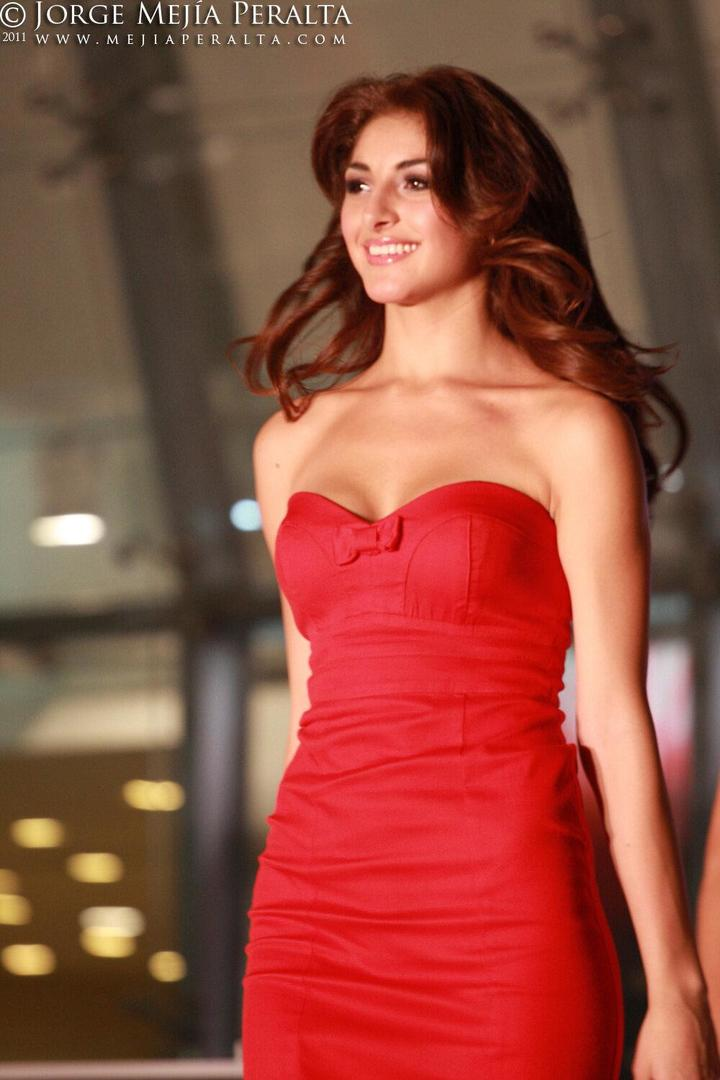

In [6]:
query_image = "0b351e597f43c6d3c55d7b435aeef066.jpg"
Image(filename=f'{config.QUERY_DIRECTORY}{query_image}') 

In [7]:
search_outputs = similarity_search_model.search(config.QUERY_PROCESSED_DIRECTORY, query_image, 3)

[[0.23887272 0.24985354 0.2822027 ]] [[ 6575 10971  3940]]


In [8]:
search_outputs

[(0.23887272, 'adb88253cfc55627000a783019a9aa24.jpg'),
 (0.24985354, '02c95648b0ef3fb52644406d53e337b0.jpg'),
 (0.2822027, '7538b3e93db137a76c79fb6ed520f4fd.jpg')]

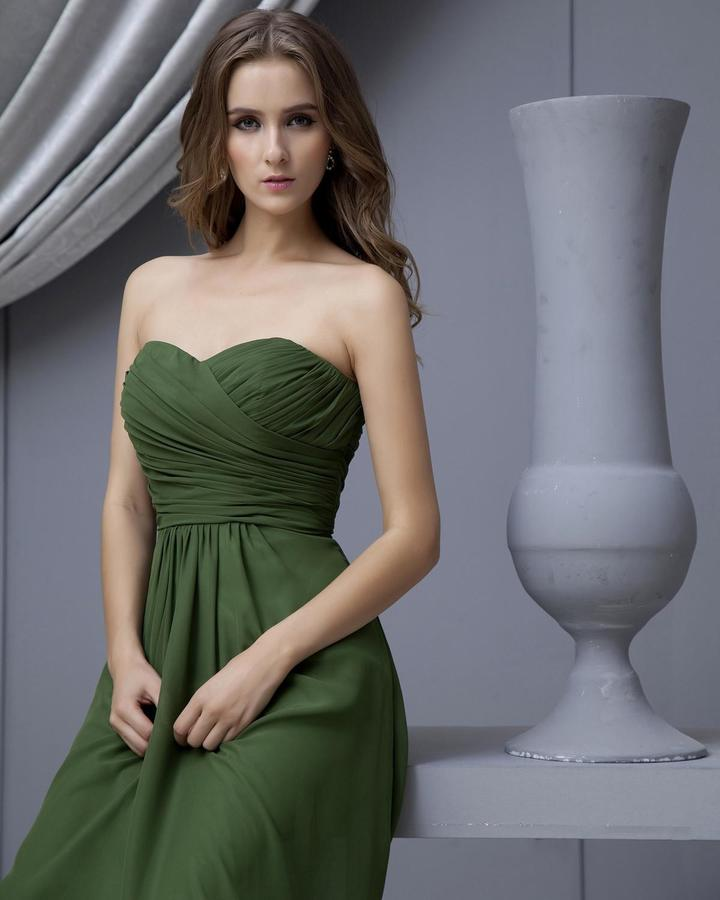

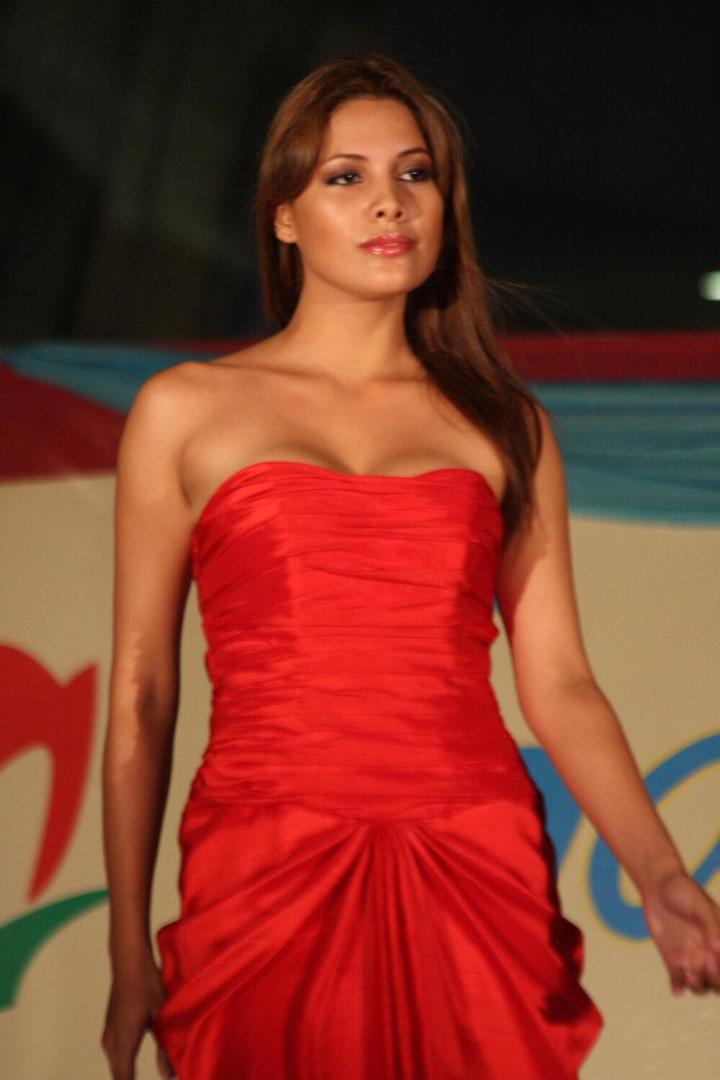

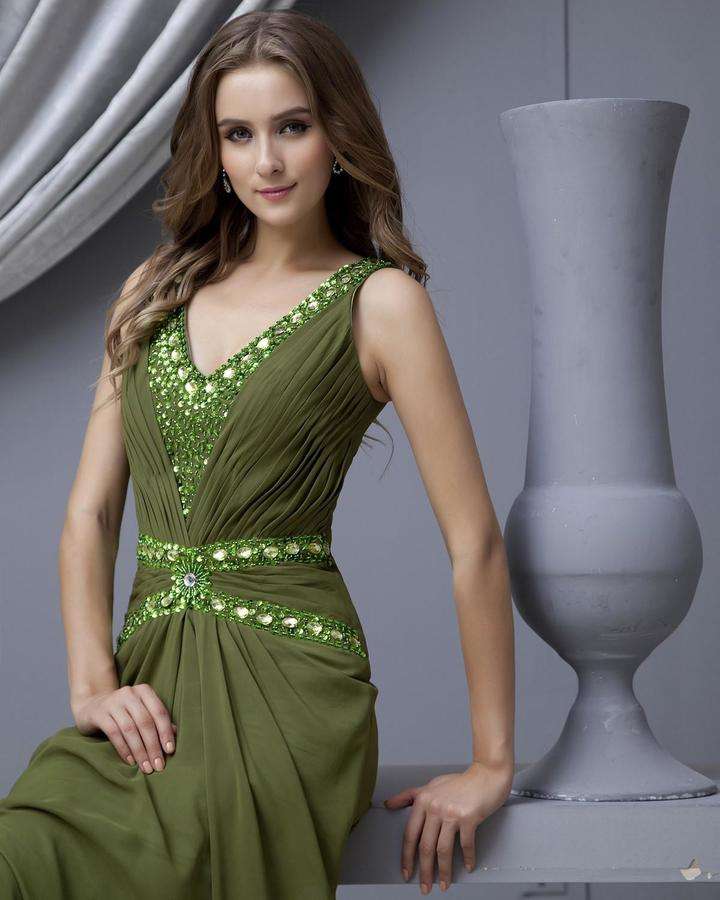

In [9]:
for output in search_outputs:
    display(Image(filename=f'{config.INDEX_DIRECTORY}{output[1]}'))